# Smoker Status Prediction
Rohitangshu Bose
MT2025106

## Import Libraries and Reproducability

In [1]:
# Import Libraries
import os, random, warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# Seeds
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

print('Libraries loaded. Set random seed =', RANDOM_SEED)

Libraries loaded. Set random seed = 42


In [2]:
# Loading Data
DATA_PATH = "train_dataset.csv"
df = pd.read_csv(DATA_PATH)

print('Loading data:', DATA_PATH)

print('Data Shape:', df.shape)
df.head()

Loading data: train_dataset.csv
Data Shape: (38984, 23)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
print("\nData Info:")
df.head()


Data Info:


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [5]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


In [6]:
print("\nSummary statistics (numeric features):")
df.describe().T


Summary statistics (numeric features):


,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


## Exploratory Data Analysis (EDA)

Target distribution, histograms, KDE, boxplots, and clustermap.

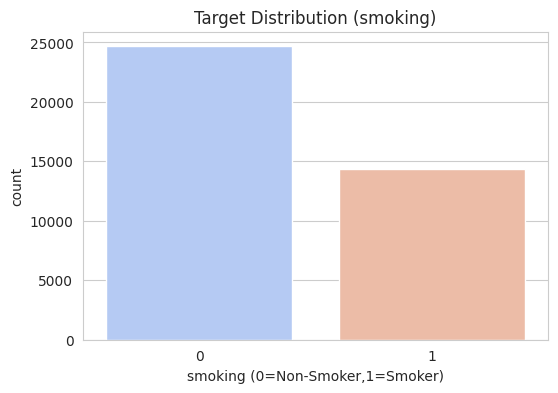

In [7]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['smoking'], palette='coolwarm')
plt.title('Target Distribution (smoking)')
plt.xlabel('smoking (0=Non-Smoker,1=Smoker)')
plt.ylabel('count')
plt.show()

In [8]:
print(df['smoking'].value_counts(), '\nProportions:\n', df['smoking'].value_counts(normalize=True))

smoking
0    24666
1    14318
Name: count, dtype: int64 
Proportions:
 smoking
0    0.632721
1    0.367279
Name: proportion, dtype: float64


<Figure size 1400x1000 with 0 Axes>

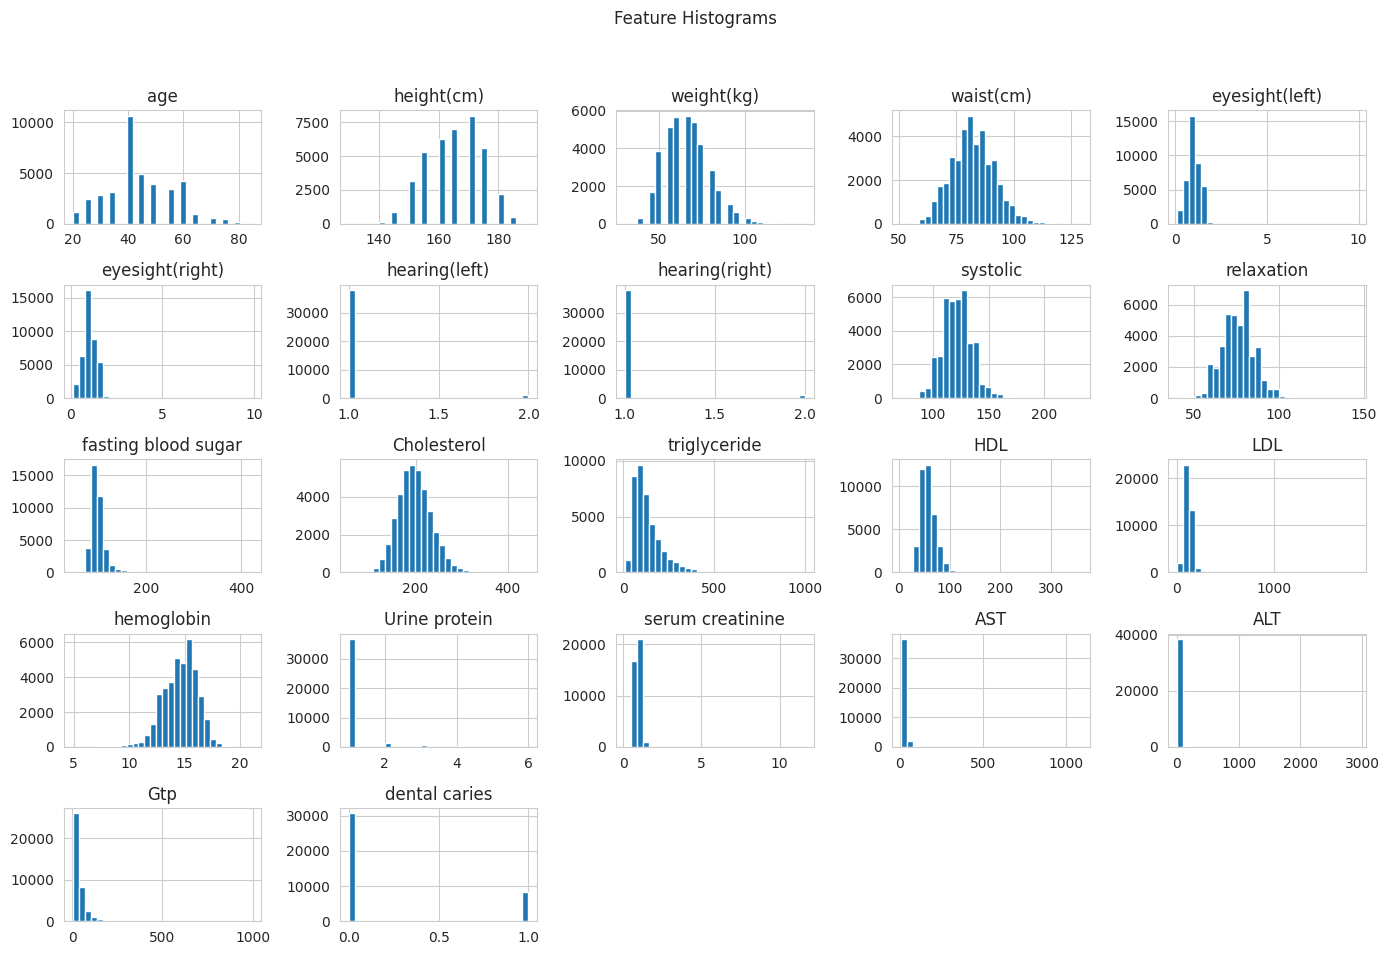

In [9]:
# Histograms for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c!='smoking']
plt.figure(figsize=(14,10))
df[num_cols].hist(bins=30, figsize=(14,10))
plt.suptitle('Feature Histograms')
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

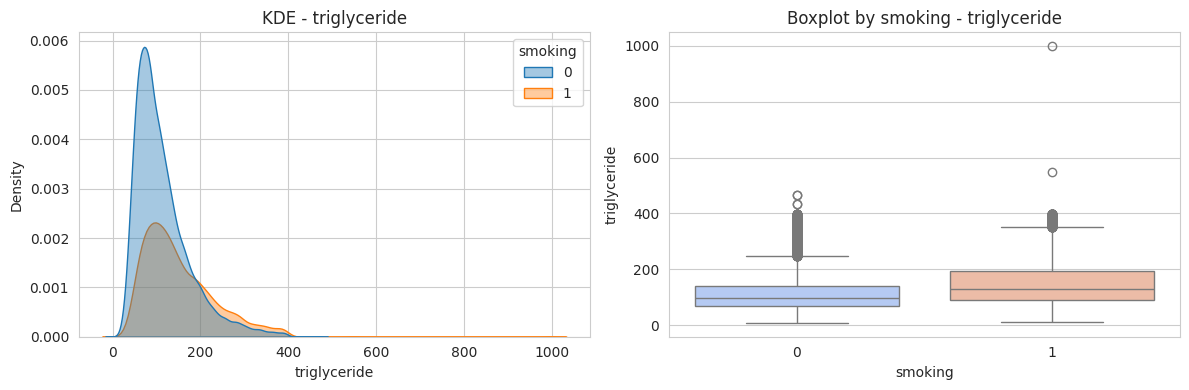

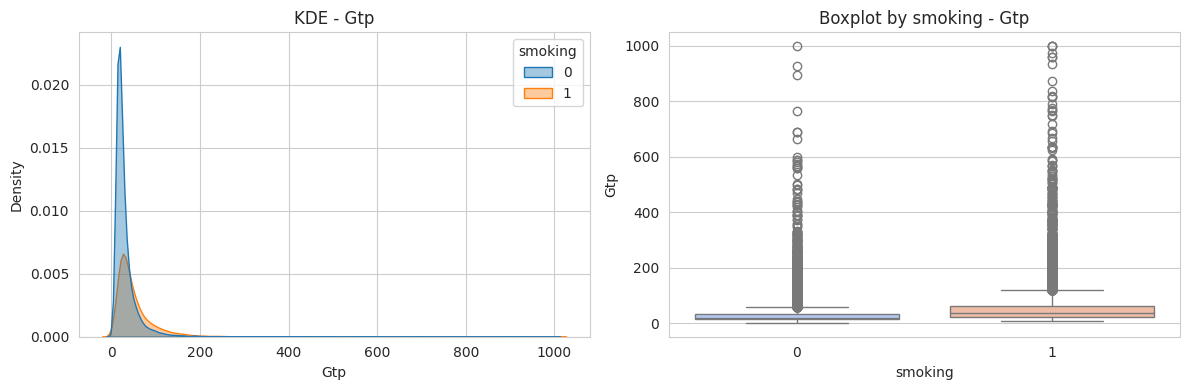

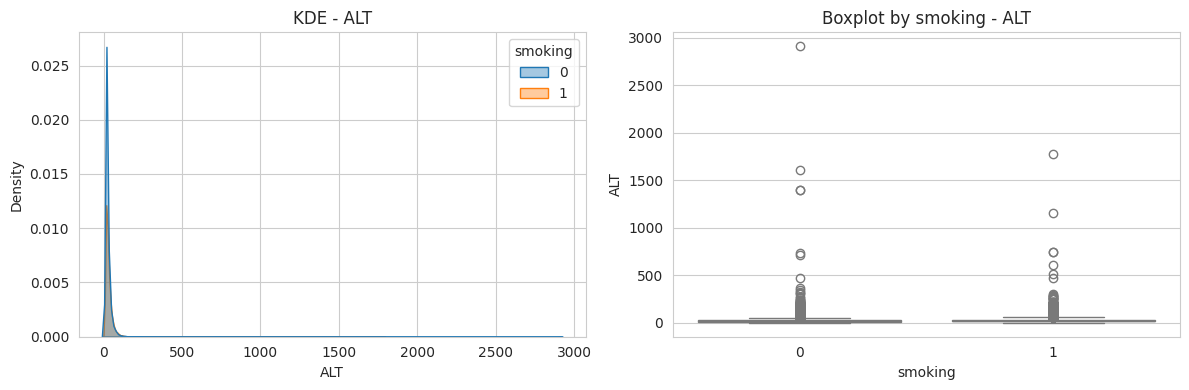

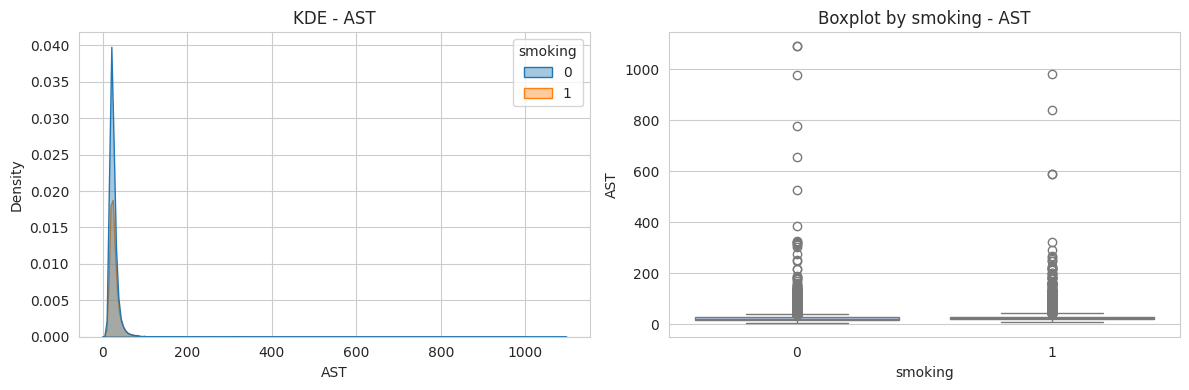

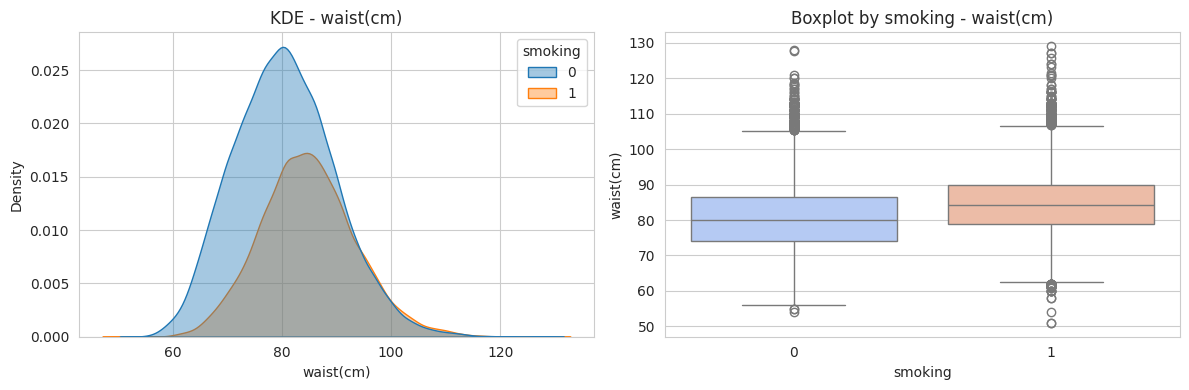

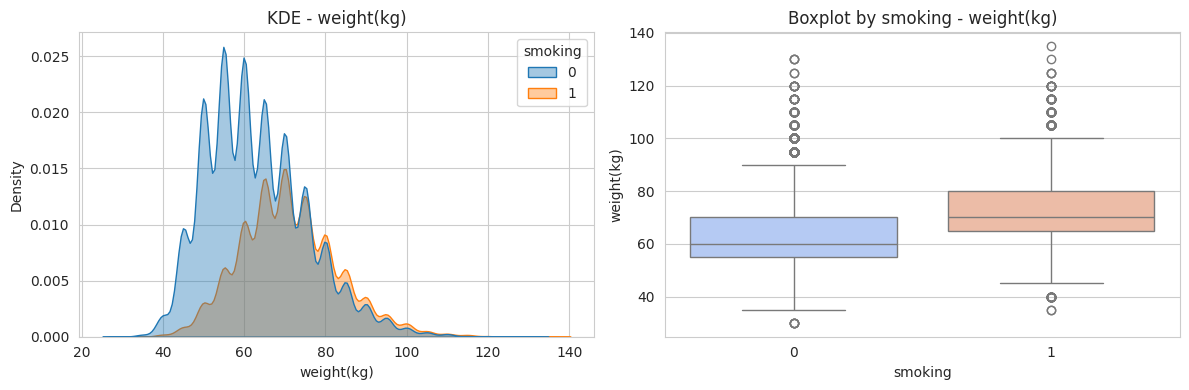

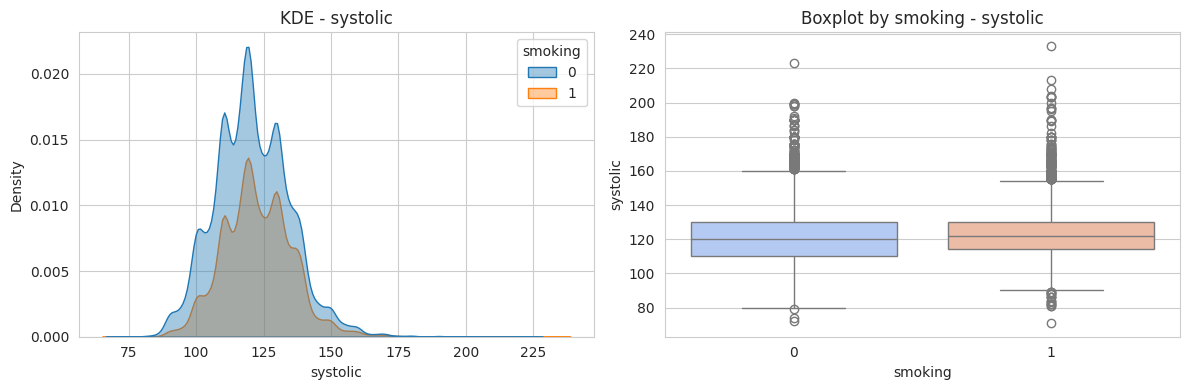

In [10]:
# KDE + boxplots for selected variables
selected = ['triglyceride','Gtp','ALT','AST','waist(cm)','weight(kg)','systolic']
selected = [c for c in selected if c in df.columns]
for col in selected:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.kdeplot(data=df, x=col, hue='smoking', fill=True, alpha=0.4, ax=ax[0])
    ax[0].set_title(f'KDE - {col}')
    sns.boxplot(data=df, x='smoking', y=col, palette='coolwarm', ax=ax[1])
    ax[1].set_title(f'Boxplot by smoking - {col}')
    plt.tight_layout()
    plt.show()

In [11]:
# Skewness quantification
skew_vals = df[num_cols].skew().sort_values(ascending=False)
skew_vals.head(20)

,0
ALT,36.169306
AST,24.000164
LDL,11.764551
eyesight(right),10.117849
eyesight(left),10.107092
serum creatinine,9.025683
Gtp,6.775446
hearing(left),6.037088
hearing(right),5.933951
Urine protein,5.587743


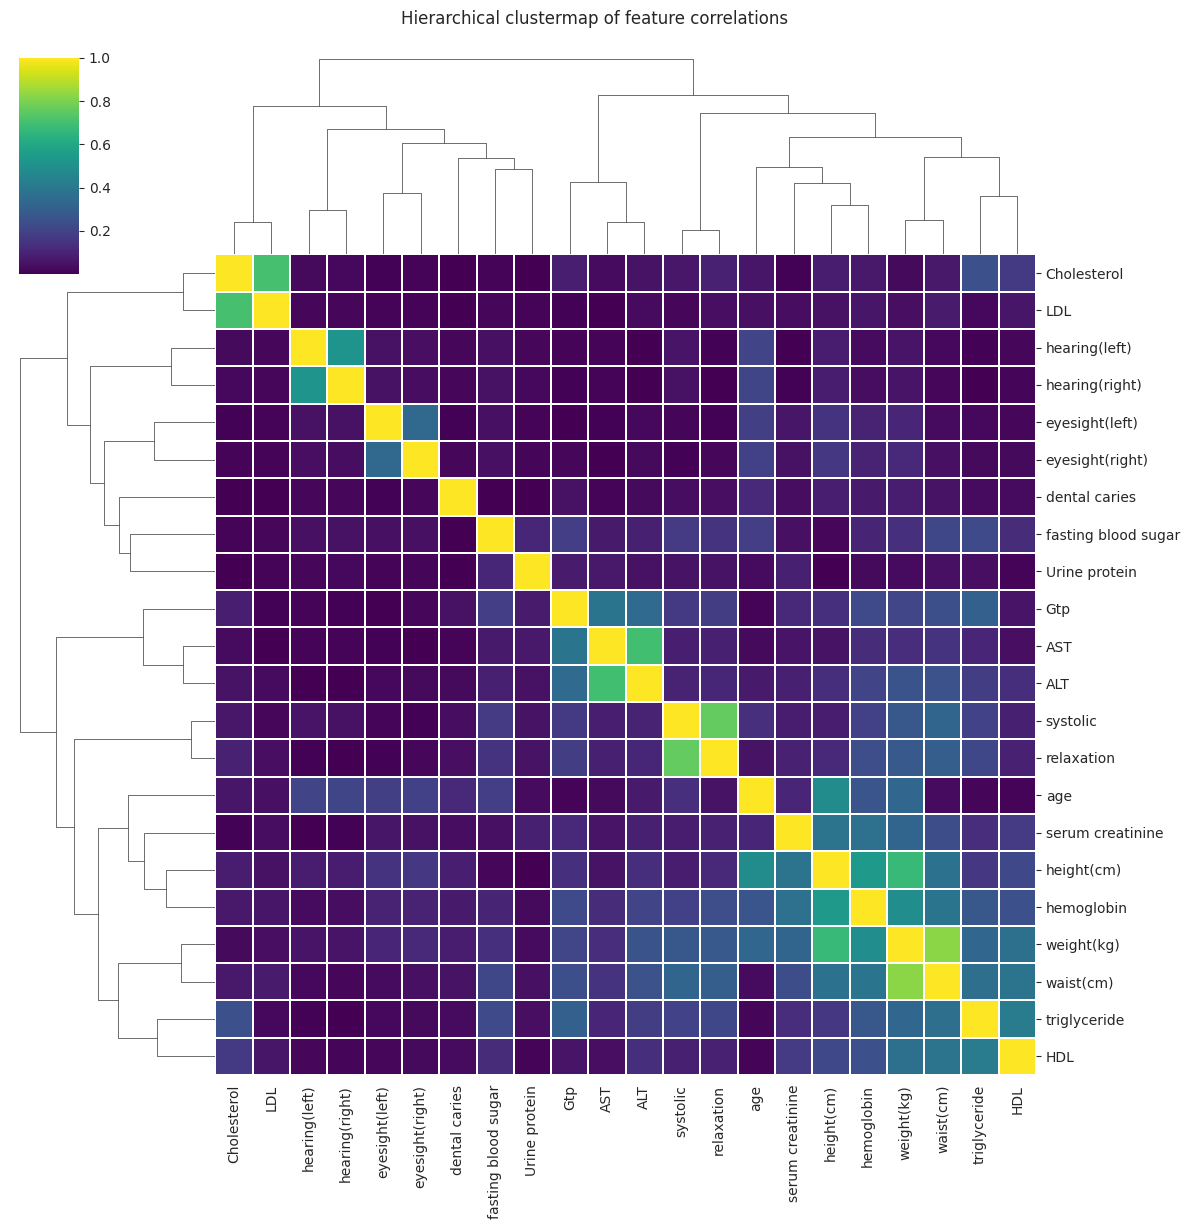

In [12]:
# Correlation clustermap
corr = df[num_cols].corr()
sns.clustermap(corr.abs(), cmap='viridis', method='ward', figsize=(12,12), linewidths=0.3)
plt.suptitle('Hierarchical clustermap of feature correlations', y=1.02)
plt.show()

## Feature Engineering

Create biologically meaningful features (BMI, WHtR, PulsePressure, ratios). Log-transform strongly skewed features.

In [13]:
# Work on a copy
df_fe = df.copy()

# Determine positively-valued skewed columns for log1p
skewed = skew_vals[skew_vals > 1].index.tolist()
skewed = [c for c in skewed if df_fe[c].min() >= 0]
print('Log-transforming:', skewed)
for c in skewed:
    df_fe[c] = np.log1p(df_fe[c])

# # Engineered features
# if 'weight(kg)' in df_fe.columns and 'height(cm)' in df_fe.columns:
#     df_fe['BMI'] = df_fe['weight(kg)'] / ((df_fe['height(cm)']/100)**2)
# if 'waist(cm)' in df_fe.columns and 'height(cm)' in df_fe.columns:
#     df_fe['WHtR'] = df_fe['waist(cm)'] / df_fe['height(cm)']
# if 'systolic' in df_fe.columns and 'relaxation' in df_fe.columns:
#     df_fe['PulsePressure'] = df_fe['systolic'] - df_fe['relaxation']
# if 'LDL' in df_fe.columns and 'HDL' in df_fe.columns:
#     df_fe['LDL_HDL_ratio'] = df_fe['LDL'] / (df_fe['HDL'] + 1e-6)
# if 'ALT' in df_fe.columns and 'AST' in df_fe.columns:
#     df_fe['ALT_AST_ratio'] = df_fe['ALT'] / (df_fe['AST'] + 1e-6)

# # Age groups
# if 'age' in df_fe.columns:
#     df_fe['AgeGroup'] = pd.cut(df_fe['age'], bins=[0,30,40,50,60,200], labels=['<30','30-40','40-50','50-60','60+'])
#     df_fe = pd.get_dummies(df_fe, columns=['AgeGroup'], drop_first=True)

print('Engineered shape:', df_fe.shape)
df_fe.head()

Log-transforming: ['ALT', 'AST', 'LDL', 'eyesight(right)', 'eyesight(left)', 'serum creatinine', 'Gtp', 'hearing(left)', 'hearing(right)', 'Urine protein', 'fasting blood sugar', 'dental caries', 'triglyceride', 'HDL']
Engineered shape: (38984, 23)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.641854,0.641854,0.693147,0.693147,118,78,...,4.262680,4.962845,19.8,0.693147,0.693147,4.127134,4.753590,4.836282,0.693147,1
1,20,175,110,110.0,0.530628,0.641854,0.693147,0.693147,119,79,...,4.276666,4.744932,15.9,0.693147,0.741937,2.995732,3.258097,3.433987,0.693147,0
2,45,155,65,86.0,0.641854,0.641854,0.693147,0.693147,110,80,...,4.060443,4.727388,13.7,1.386294,0.470004,6.994850,7.244942,5.624018,0.000000,0
3,45,165,80,94.0,0.587787,0.530628,0.693147,0.693147,158,88,...,3.850148,4.521789,16.9,0.693147,0.641854,3.496508,3.610918,3.610918,0.000000,0
4,20,165,60,81.0,0.916291,0.095310,0.693147,0.693147,109,64,...,3.871201,4.532599,14.9,0.693147,0.788457,3.295837,3.367296,2.772589,0.000000,0


## Single consistent Train/Validation/Test split

We treat the provided dataset as the entire dataset and split internally.

In [14]:
# Single correct split pipeline
X = df_fe.drop(columns=['smoking'])
y = df_fe['smoking']

# Outer split: train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Inner split: train/val
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=RANDOM_SEED)

print('Train:', X_train_final.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

Train: (24949, 22) Val: (6238, 22) Test: (7797, 22)


In [15]:
# Scaling (fit only on training)
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print('Scaled shapes:', X_train_final_scaled.shape, X_val_scaled.shape, X_test_scaled.shape)

Scaled shapes: (24949, 22) (6238, 22) (7797, 22)


## PCA for EDA & clustering

Fit PCA on training set then visualize PC1 vs PC2 and explained variance.

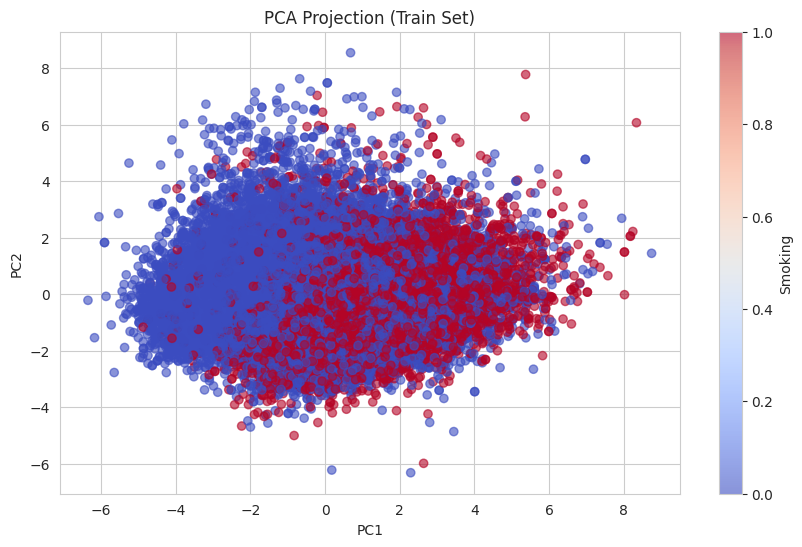

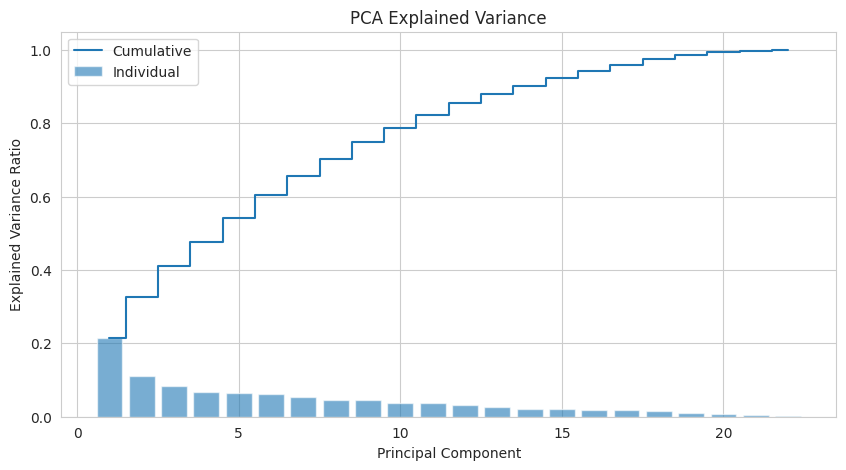

Components for 90%: 14
Components for 95%: 17
Components for 99%: 20


In [16]:
pca = PCA(n_components=min(X_train_final_scaled.shape[1], 22))
X_train_pca = pca.fit_transform(X_train_final_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Scatter PC1 vs PC2
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_final.reset_index(drop=True), cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Smoking')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA Projection (Train Set)')
plt.show()

# Explained variance
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)
plt.figure(figsize=(10,5))
plt.bar(range(1,len(explained)+1), explained, alpha=0.6, label='Individual')
plt.step(range(1,len(cumulative)+1), cumulative, where='mid', label='Cumulative')
plt.xlabel('Principal Component'); plt.ylabel('Explained Variance Ratio'); plt.legend(); plt.title('PCA Explained Variance')
plt.show()

def n_for_threshold(th):
    return int(np.argmax(cumulative >= th) + 1)
print('Components for 90%:', n_for_threshold(0.90))
print('Components for 95%:', n_for_threshold(0.95))
print('Components for 99%:', n_for_threshold(0.99))

In [17]:
X_train_final_scaled = X_train_pca
X_val_scaled = X_val_pca
X_test_scaled = X_test_pca

## Unsupervised Clustering (use PCA-reduced space for stability)

In [18]:
# Choose number of PCs (95% variance) for clustering
n95 = n_for_threshold(0.95)
X_clust = X_train_pca[:, :n95]
print('Clustering on', X_clust.shape[1], 'PCs')

Clustering on 17 PCs


In [19]:
# KMeans, DBSCAN, Agglomerative, GMM and ARI evaluation
kmeans_labels = KMeans(n_clusters=2, random_state=RANDOM_SEED).fit_predict(X_clust)
db_labels = DBSCAN(eps=1.5, min_samples=10).fit_predict(X_clust)
agg_labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_clust)
gmm_labels = GaussianMixture(n_components=2, random_state=RANDOM_SEED).fit_predict(X_clust)

ari_k = adjusted_rand_score(y_train_final.reset_index(drop=True), kmeans_labels)
ari_db = adjusted_rand_score(y_train_final.reset_index(drop=True), db_labels)
ari_agg = adjusted_rand_score(y_train_final.reset_index(drop=True), agg_labels)
ari_gmm = adjusted_rand_score(y_train_final.reset_index(drop=True), gmm_labels)

print('ARI KMeans:', ari_k)
print('ARI DBSCAN:', ari_db)
print('ARI Agglomerative:', ari_agg)
print('ARI GMM:', ari_gmm)

ARI KMeans: 0.1292600715444679
ARI DBSCAN: -0.012717517800111506
ARI Agglomerative: 0.06563831324027929
ARI GMM: -0.0043773985126224785


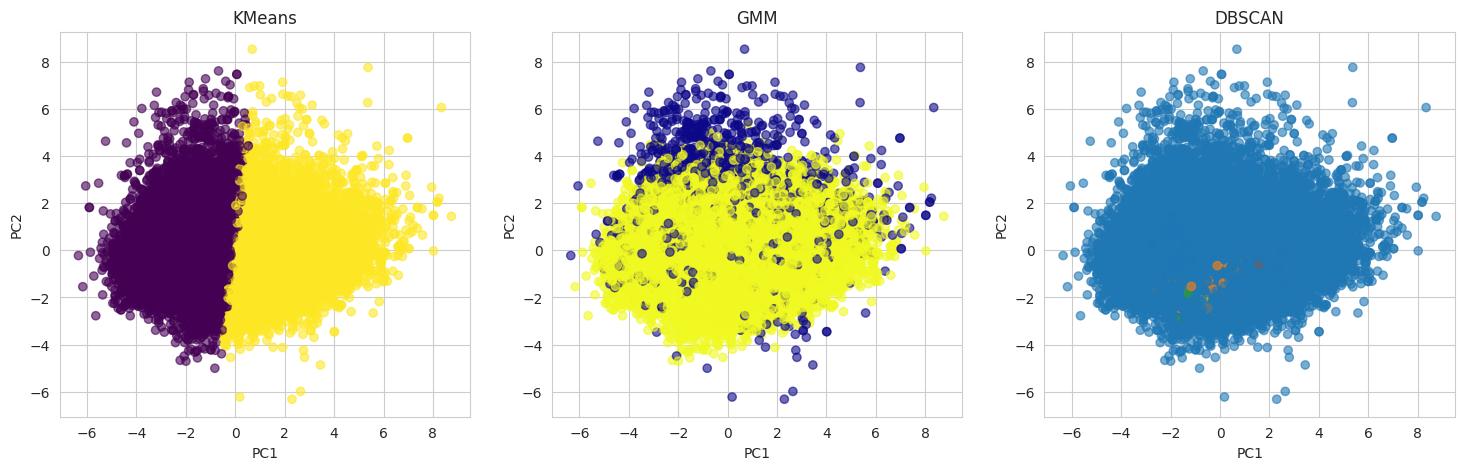

In [20]:
# Plot clusters (PC1 vs PC2)
fig, axes = plt.subplots(1,3,figsize=(18,5))
axes[0].scatter(X_clust[:,0], X_clust[:,1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[0].set_title('KMeans')
axes[1].scatter(X_clust[:,0], X_clust[:,1], c=gmm_labels, cmap='plasma', alpha=0.6)
axes[1].set_title('GMM')
axes[2].scatter(X_clust[:,0], X_clust[:,1], c=db_labels, cmap='tab10', alpha=0.6)
axes[2].set_title('DBSCAN')
for ax in axes:
    ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
plt.show()

## Supervised Models

Train & evaluate Logistic Regression, SVM (RBF), and ANN (PyTorch).

In [21]:
# ============================================================
# Optimized Logistic Regression
# ============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report

print("Section: Optimized Logistic Regression")

# Hyperparameter grid
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 0.5, 1, 2, 5],
    "solver": ["liblinear"],           # supports both L1 & L2
    "class_weight": [None, "balanced"]
}

lr_base = LogisticRegression(max_iter=2000, random_state=RANDOM_SEED)

grid = GridSearchCV(
    lr_base,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_final_scaled, y_train_final)

# Best model
best_lr = grid.best_estimator_
print("Best LR Parameters:", grid.best_params_)

# Predictions
y_test_pred_lr = best_lr.predict(X_test_scaled)
y_test_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("\n=== Logistic Regression Results (Optimized)")
print("Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Precision:", precision_score(y_test, y_test_pred_lr))
print("Recall:", recall_score(y_test, y_test_pred_lr))
print("F1 Score:", f1_score(y_test, y_test_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr))


Section: Optimized Logistic Regression
Best LR Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

=== Logistic Regression Results (Optimized)
Accuracy: 0.7242529177888931
Precision: 0.5938979484481852
Recall: 0.7884078212290503
F1 Score: 0.6774677467746775
ROC-AUC: 0.8113176764170613

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      4933
           1       0.59      0.79      0.68      2864

    accuracy                           0.72      7797
   macro avg       0.72      0.74      0.72      7797
weighted avg       0.75      0.72      0.73      7797



In [22]:
# SVM (RBF)
svm = SVC(kernel='rbf', probability=True, random_state=RANDOM_SEED)
svm.fit(X_train_final_scaled, y_train_final)
y_test_pred_svm = svm.predict(X_test_scaled)
y_test_proba_svm = svm.predict_proba(X_test_scaled)[:,1]
print('SVM Test Acc:', accuracy_score(y_test, y_test_pred_svm))
print('SVM F1:', f1_score(y_test, y_test_pred_svm))
print('SVM ROC AUC:', roc_auc_score(y_test, y_test_proba_svm))
print(classification_report(y_test, y_test_pred_svm))

SVM Test Acc: 0.7524688982942157
SVM F1: 0.6646977067407922
SVM ROC AUC: 0.8285376701430454
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4933
           1       0.66      0.67      0.66      2864

    accuracy                           0.75      7797
   macro avg       0.73      0.73      0.73      7797
weighted avg       0.75      0.75      0.75      7797



### PyTorch ANN (simple MLP with early stopping)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

BATCH = 512  # larger batch performs better on tabular data

# Dataset pipelines
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train_final_scaled, y_train_final.values.reshape(-1, 1))
).shuffle(20000).batch(BATCH).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val_scaled, y_val.values.reshape(-1, 1))
).batch(BATCH).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test_scaled, y_test.values.reshape(-1, 1))
).batch(BATCH).prefetch(tf.data.AUTOTUNE)


In [24]:
from tensorflow.keras import layers, models

input_dim = X_train_final_scaled.shape[1]

def build_optimized_ann(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5)),
        layers.BatchNormalization(),
        layers.Activation(tf.nn.gelu),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_regularizer=regularizers.l2(1e-5)),
        layers.BatchNormalization(),
        layers.Activation(tf.nn.gelu),
        layers.Dropout(0.25),

        layers.Dense(64, kernel_regularizer=regularizers.l2(1e-5)),
        layers.BatchNormalization(),
        layers.Activation(tf.nn.gelu),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])
    return model


input_dim = X_train_final_scaled.shape[1]
model = build_optimized_ann(input_dim)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

lr_sched = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

In [26]:
# -------------------------------
# Train model
# -------------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=60,
    callbacks=[early, lr_sched],
    verbose=2
)

Epoch 1/60
49/49 - 12s - 251ms/step - accuracy: 0.6857 - loss: 0.5918 - val_accuracy: 0.7340 - val_loss: 0.5369 - learning_rate: 1.0000e-03
Epoch 2/60
49/49 - 0s - 5ms/step - accuracy: 0.7294 - loss: 0.5094 - val_accuracy: 0.7403 - val_loss: 0.4924 - learning_rate: 1.0000e-03
Epoch 3/60
49/49 - 0s - 4ms/step - accuracy: 0.7391 - loss: 0.4962 - val_accuracy: 0.7482 - val_loss: 0.4812 - learning_rate: 1.0000e-03
Epoch 4/60
49/49 - 0s - 5ms/step - accuracy: 0.7419 - loss: 0.4925 - val_accuracy: 0.7518 - val_loss: 0.4777 - learning_rate: 1.0000e-03
Epoch 5/60
49/49 - 0s - 6ms/step - accuracy: 0.7459 - loss: 0.4894 - val_accuracy: 0.7554 - val_loss: 0.4750 - learning_rate: 1.0000e-03
Epoch 6/60
49/49 - 0s - 6ms/step - accuracy: 0.7509 - loss: 0.4833 - val_accuracy: 0.7557 - val_loss: 0.4747 - learning_rate: 1.0000e-03
Epoch 7/60
49/49 - 0s - 4ms/step - accuracy: 0.7523 - loss: 0.4810 - val_accuracy: 0.7573 - val_loss: 0.4735 - learning_rate: 1.0000e-03
Epoch 8/60
49/49 - 0s - 5ms/step - acc

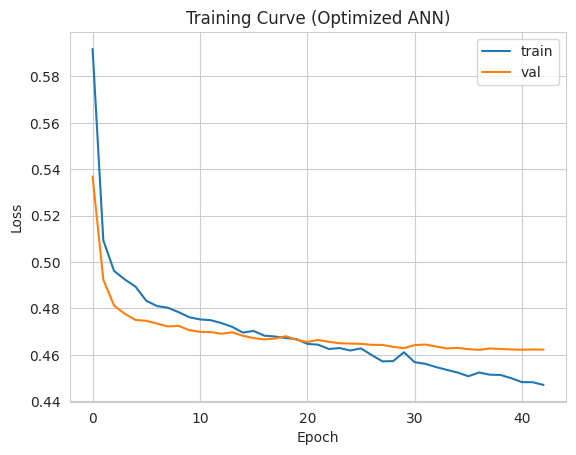

In [27]:
# -------------------------------
# Training curve
# -------------------------------
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(); plt.title('Training Curve (Optimized ANN)')
plt.show()


In [28]:
# -------------------------------
# Evaluate on test set
# -------------------------------
y_test_proba_ann = model.predict(test_ds).reshape(-1)
y_test_pred_ann = (y_test_proba_ann > 0.5).astype(int)

print("ANN Test Acc:", accuracy_score(y_test, y_test_pred_ann))
print("ANN F1:", f1_score(y_test, y_test_pred_ann))
print("ANN ROC AUC:", roc_auc_score(y_test, y_test_proba_ann))
print(classification_report(y_test, y_test_pred_ann))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
ANN Test Acc: 0.755290496344748
ANN F1: 0.6747357654278895
ANN ROC AUC: 0.8380448144805195
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      4933
           1       0.66      0.69      0.67      2864

    accuracy                           0.76      7797
   macro avg       0.74      0.74      0.74      7797
weighted avg       0.76      0.76      0.76      7797



## Comparison table

In [29]:
# Model Comparison

import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

print("Building comparison table...")

# ------------------------------------------------------------
# Ensure PROBABILITIES are correctly shaped
# SVM multiclass compatibility handled earlier
# ------------------------------------------------------------

# LR probability → already y_test_proba_lr
# SVM probability → y_test_proba_svm
# ANN probability → y_test_proba_ann

# ------------------------------------------------------------
# Construct result table
# ------------------------------------------------------------

results = {
    "Model": ["Logistic Regression", "SVM (RBF)", "ANN"],

    "Accuracy": [
        accuracy_score(y_test, y_test_pred_lr),
        accuracy_score(y_test, y_test_pred_svm),
        accuracy_score(y_test, y_test_pred_ann)
    ],

    "Precision": [
        precision_score(y_test, y_test_pred_lr),
        precision_score(y_test, y_test_pred_svm),
        precision_score(y_test, y_test_pred_ann)
    ],

    "Recall": [
        recall_score(y_test, y_test_pred_lr),
        recall_score(y_test, y_test_pred_svm),
        recall_score(y_test, y_test_pred_ann)
    ],

    "F1 Score": [
        f1_score(y_test, y_test_pred_lr),
        f1_score(y_test, y_test_pred_svm),
        f1_score(y_test, y_test_pred_ann)
    ],

    "ROC-AUC": [
        roc_auc_score(y_test, y_test_proba_lr),
        roc_auc_score(y_test, y_test_proba_svm),
        roc_auc_score(y_test, y_test_proba_ann)
    ]
}

df_results = pd.DataFrame(results)

# ---------- Sort by Accuracy (optional) ----------
df_results = df_results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# ---------- Round for readability ----------
df_results = df_results.round(4)

print("\n=== FINAL MODEL COMPARISON ===")
df_results


Building comparison table...

=== FINAL MODEL COMPARISON ===


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,ANN,0.7553,0.6592,0.6910,0.6747,0.8380
1,SVM (RBF),0.7525,0.6615,0.6679,0.6647,0.8285
2,Logistic Regression,0.7243,0.5939,0.7884,0.6775,0.8113


## Confusion matrices

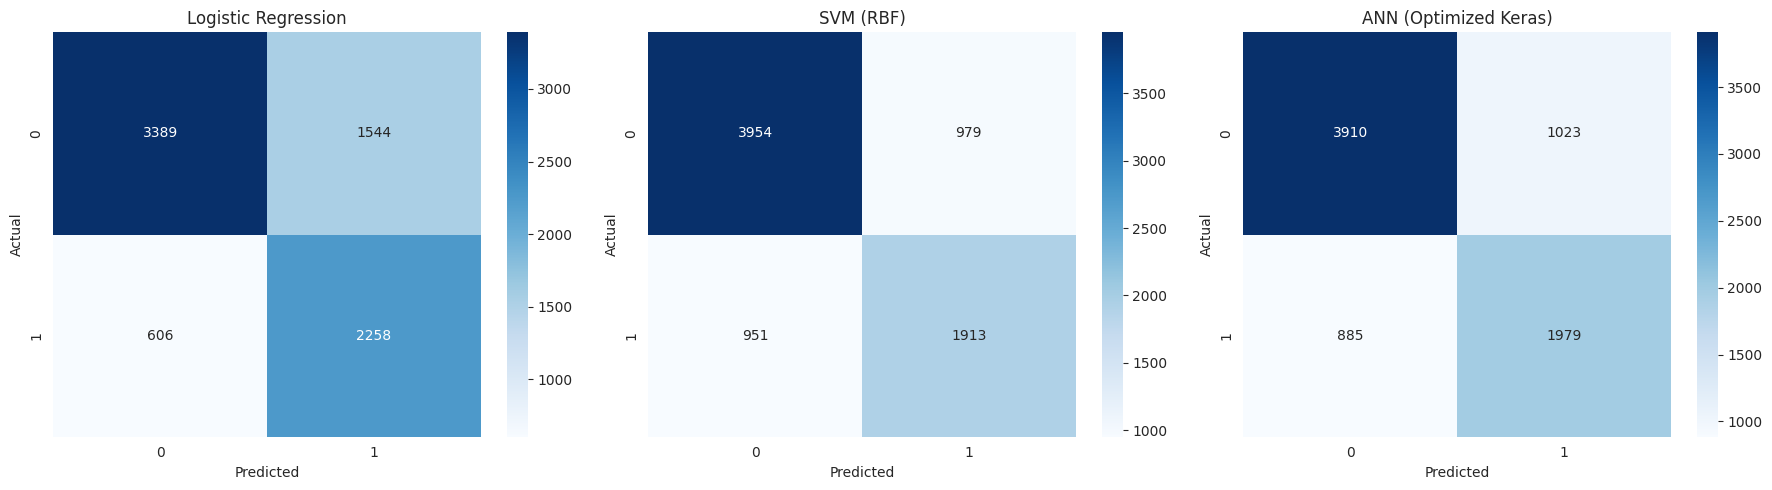

In [30]:
# Confusion Matrices

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18, 5))

def plot_cm(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Logistic Regression CM
ax1 = plt.subplot(1, 3, 1)
plot_cm(ax1, y_test, y_test_pred_lr, "Logistic Regression")

# SVM (RBF) CM
ax2 = plt.subplot(1, 3, 2)
plot_cm(ax2, y_test, y_test_pred_svm, "SVM (RBF)")

# ANN CM
ax3 = plt.subplot(1, 3, 3)
plot_cm(ax3, y_test, y_test_pred_ann, "ANN (Optimized Keras)")

plt.tight_layout()
plt.show()
